In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import math
import csv
import os

In [22]:
def readfile(filename):
    x = []
    y = []
    with open(filename) as file:
        read = csv.reader(file, delimiter=',')
        for row in read:
            x.append(float(row[0]))
            y.append(float(row[1]))
    return x, y

In [3]:
def show_fitting_line(x):
    n = len(x) - 1
    print('Fitting line: ',end='')
    #x^(n-1) ~ x^1
    for i in range(n):
        print(x[i][0], 'X ^', n - i, ' + ', end='')
    #x^0
    print(x[n][0])

In [4]:
def plot(xi, yi, lse_x, nt_x):
    xi_min = min(xi)
    xi_max = max(xi)
    x = np.linspace(xi_min - 1, xi_max + 1, 500)
    # rlse
    plt.subplot(2, 1, 1)
    plt.title('LSE')
    plt.plot(xi, yi, 'ro')
    y = np.zeros(x.shape)
    for i in range(len(lse_x)):
        y += lse_x[i] * np.power(x, len(lse_x) - 1 - i)
    plt.plot(x, y, '-k')
    # newton
    plt.subplot(2, 1, 2)
    plt.title('Newton\'s Method')
    plt.plot(xi, yi, 'ro')
    y = np.zeros(x.shape)
    for i in range(len(nt_x)):
        y += nt_x[i] * np.power(x, len(nt_x) - 1 - i)
    plt.plot(x, y, '-k')
    plt.tight_layout(pad=0.4, w_pad=4.0, h_pad=3.0)
    plt.show()

In [5]:
def T(x):
    transpose = np.zeros((x.shape[1], x.shape[0]))
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            transpose[j][i] = x[i][j]
    return transpose

In [6]:
def ADD(A, B):
    m = max(A.shape[0], B.shape[0])
    n = max(A.shape[1], B.shape[1])
    add = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            if (i < A.shape[0]) & (j < A.shape[1]):
                a = A[i][j]
            else:
                a = 0
            if (i < B.shape[0]) & (j < B.shape[1]):
                b = B[i][j]
            else:
                b = 0
            add[i][j] = a + b
    return add

In [7]:
def MUL(A, B):
    m = A.shape[0]
    n = A.shape[1]
    p = B.shape[0]
    k = B.shape[1]
    mul = np.zeros((m, k))
    if (n != p):
        print("MUL error!")
        return
    for i in range(m):
        for j in range(n):
            for t in range(k):
                mul[i][t] += A[i][j] * B[j][t]
    return mul

In [8]:
def MINUS(A, B):
    minus = ADD(A, MUL_S(-1, B))
    return minus

In [9]:
def I(n):
    I = np.zeros((n, n))
    for i in range(n):
        I[i][i] = 1
    return I

In [10]:
def MUL_S(s, x):
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i][j] = s * x[i][j]
    return x

In [11]:
def INV(x):
    m = x.shape[0]
    n = x.shape[1]
    if (m != n):
        print("INV error!")
        return
    inverse = I(m)
    for i in range(m):
        t1 = x[i][i]
        for j in range(m):
            x[i][j] = x[i][j] / t1
            inverse[i][j] = inverse[i][j] / t1
        for k in range(i + 1, m):
            t2 = -x[k][i]
            for j in range(m):
                x[k][j] += t2 * x[i][j]
                inverse[k][j] += t2 * inverse[i][j]
    
    for i in range(m - 1, -1, -1):
        for k in range(i - 1, -1, -1):
            t3 = -x[k][i]
            for j in range(m):
                x[k][j] += t3 * x[i][j]
                inverse[k][j] += t3 * inverse[i][j]
    return inverse

In [12]:
def get_loss(A, x, b):
    loss = np.sum(np.square(ADD(MUL(A, x), MUL_S(-1, b)))) # A@x - b
    return loss

In [13]:
def rLSE(A, b, lse_lambda):
    n = A.shape[1]
    AT = T(A)
    # np.linalg.inv(A.T@A + lse_lambda*np.identity(n))@A.T@b
    x = MUL(MUL(INV(ADD(MUL(AT, A), MUL_S(lse_lambda, I(n)))), AT), b)
    loss = get_loss(A, x, b)
    return x, loss

In [33]:
def newton(A, b):
    n = A.shape[1]
    x0 = np.zeros((n,1))
    for i in range(n):
        x0[i] = 100
    eps = 100
    while eps > 1e-6:
        AT2 = MUL_S(2, T(A))
        AT2A = MUL(AT2, A)
        AT2b = MUL(AT2, b)
        AT2Ax = MUL(AT2A, x0)
        # (np.linalg.inv(2*A.T@A))@(2*A.T@A@x0 - 2*A.T@b)
        x1 = x0 - MUL(INV(AT2A), MINUS(AT2Ax, AT2b))
        eps = abs(np.sum(np.square(MINUS(x1, x0)))/n) # x1 - x0
        x0 = x1
    loss = get_loss(A, x0, b)
    return x0, loss

In [15]:
filename = input('filename: ')

filename: testfile.txt


In [16]:
pbases = int(input('the number of polynomial bases n: '))

the number of polynomial bases n: 3


In [17]:
lse_lambda = float(input('lambda for lse: '))

lambda for lse: 10000


In [23]:
xi, yi = readfile(filename)
A = np.zeros((len(xi), pbases))
for j in range(pbases):
    A[:, j] = np.power(xi, pbases - 1 - j).reshape(-1)
b = np.asarray(yi, dtype='float').reshape((-1, 1))

In [19]:
lse_x, lse_loss = rLSE(A, b , lse_lambda)
print('LSE:')
show_fitting_line(lse_x)
print('Total error: ', lse_loss)

LSE:
Fitting line: 0.834533282700286 X ^ 2  + 0.09314819831918814 X ^ 1  + 0.04695069927346928
Total error:  22649.738493024146


In [34]:
b = np.asarray(yi, dtype='float').reshape((-1, 1))
nt_x, nt_loss = newton(A, b)
print(nt_x)
print('Newton\'s Method:')
show_fitting_line(nt_x)
print('Total error: ', nt_loss)

[[ 3.02385339]
 [ 4.90619026]
 [-0.23140176]]
Newton's Method:
Fitting line: 3.0238533934865712 X ^ 2  + 4.9061902638638 X ^ 1  + -0.23140175608772484
Total error:  26.55995949933306


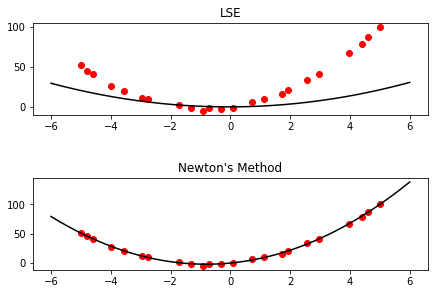

In [29]:
plot(xi, yi, lse_x, nt_x)